<a href="https://colab.research.google.com/github/Shiva-Chakravarthy-Gollapudi/info5502-spring2022/blob/main/INFO_5502_Mid_term_Exam_Spring2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Mid-term Exam (03/10/2022, 80 points in total)

In [70]:

from datascience import *

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score 

<span style='background:yellow'>**Question 1 (5 pt).**</span> Make an array called `weird_numbers` containing the following numbers (in the given order):

1. -3
2. the sine of 2.1
3. 5
4. 4 to the power of the cosine of 4.2

*Hint:* `sin` and `cos` are functions in the `math` module.

In [20]:
#### You code here


import math as m

weird_numbers=[]
weird_numbers.append(-3)
weird_numbers.append(m.sin(2.1))
weird_numbers.append(5)
weird_numbers.append(pow(4,m.cos(4.2)))

# printing the array of numbers 
print(weird_numbers) 

[-3, 0.8632093666488737, 5, 0.5067964617539602]


<span style='background:yellow'>**Question 2 (5 pt).**</span> Write a simple function that takes in a number (weight in pounds) and returns a number which is the coreesponding conversion to kg.

Test it by calling the function on 15 and 27. E.g., `convert_pounds_to_kg(15)`, `convert_pounds_to_kg(27)`. Print both to screen.

Hint: 1 pound = 0.453592 kg

In [21]:
#### You code here

def convert_pounds_to_kg(number):
    """Converts a number in pounds to kg."""
    kgs = number * 0.453592
    return kgs

    
    
print(convert_pounds_to_kg(15))
print(convert_pounds_to_kg(27))


6.8038799999999995
12.246984


<span style='background:yellow'>**Question 3 (5 pt).**</span> We've loaded an array of temperatures in the next cell.  Each number is the highest temperature observed on a day at a climate observation station, mostly from the US.  Since they're from the US government agency [NOAA](noaa.gov), all the temperatures are in Fahrenheit.  Convert them all to Celsius by first subtracting 32 from them, then multiplying the results by $\frac{5}{9}$. Make sure to **ROUND** the final result after converting to Celsius to the nearest integer using the `np.round` function. Download the data from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/temperatures.csv

In [22]:
#### You code here

max_temperatures = Table.read_table("temperatures.csv").column("Daily Max Temperature")

celsius_max_temperatures = np.round((max_temperatures - 32) * (5/9))

celsius_max_temperatures



array([-4., 31., 32., ..., 17., 23., 16.])

<span style='background:yellow'>**Question 4 (5 pt).**</span> Suppose you have 4 apples, 3 oranges, and 3 pineapples.  (Perhaps you're using Python to solve a high school Algebra problem.)  Create a table that contains this information.  It should have two columns: `fruit name` and `count`.  Assign the new table to the variable `fruits`.

**Note:** Use lower-case and singular words for the name of each fruit, like `"apple"`.

In [31]:
#### You code here

fruits = Table().with_columns('fruit name',make_array('apple','orange','pineapple'),
                      'count',make_array(4,3,3))
                           
fruits

fruit name,count
apple,4
orange,3
pineapple,3


<span style='background:yellow'>**Question 5 (10 pt).**</span> Below we load a table containing 200,000 weekday Uber rides in the Boston, Massachusetts metropolitan area from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride, in minutes. Produce a histogram of all ride times in Boston using the given bins. Download the data from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/boston.csv

In [76]:
#### You code here
boston = Table.read_table("boston.csv")
boston.show(4)

sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


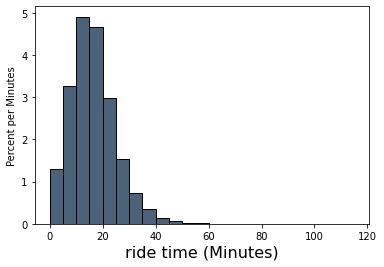

In [79]:
bins = np.arange(0, 120, 5)
boston.hist("ride time", bins=bins, unit="Minutes")

<span style='background:yellow'>**Question 6 (20 pt).**</span> Below is a dataset we collected from this website: https://ddr.densho.org/narrators/?page=1. Narrators are the interview subjects of oral histories contained in the Densho Digital Repository. The interviewees, or narrators, share their life histories to preserve history, educate the public, and promote tolerance. We urge our users to approach these materials in the same spirit. You are required to conduct the exploratory data analysis on the location, year of born, generation, and gender. Please select the best visualiztions to present your results. Download the data from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/Combined-data.xlsx

In [134]:
#### You code here

df = pd.read_excel (r'/content/Combined-data.xlsx')
print(df.head())
print('shape of the date:', df.shape)

#to find the null values in the column 
print('\nTo find the missing values in each column:')
print(df.isnull().sum())

# check the distribution of Age
# dropping the rows that have null values in  Year column

                Narrator    Location    Year Generation  Gender
0           Kay Aiko Abe  Washington  1927.0      Nisei  female
1                Art Abe  Washington  1921.0      Nisei    male
2  Sharon Tanagi Aburano  Washington  1925.0      Nisei  female
3        Toshiko Aiboshi  California  1928.0      Nisei  female
4             Yae Aihara  Washington  1925.0      Nisei  female
shape of the date: (904, 5)

To find the missing values in each column:
Narrator        0
Location       72
Year          194
Generation     54
Gender         54
dtype: int64


In [149]:
#Removing the null values 
df1 = df.dropna()
print(df1.isnull().sum())
print('\nshape of the data after removing the null values:', df1.shape)

Narrator      0
Location      0
Year          0
Generation    0
Gender        0
dtype: int64

shape of the data after removing the null values: (645, 5)


male      360
female    285
Name: Gender, dtype: int64


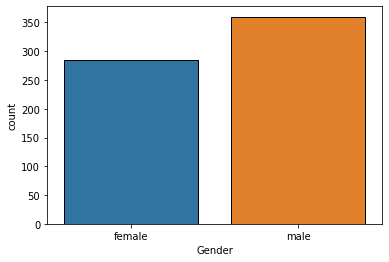

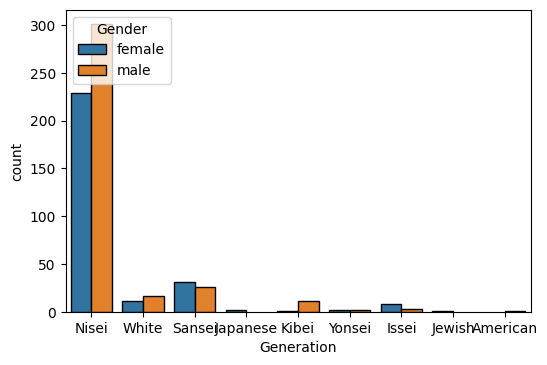

In [152]:
# Gender count
print(df1.Gender.value_counts())
sns.countplot(x = 'Gender', data = df1);

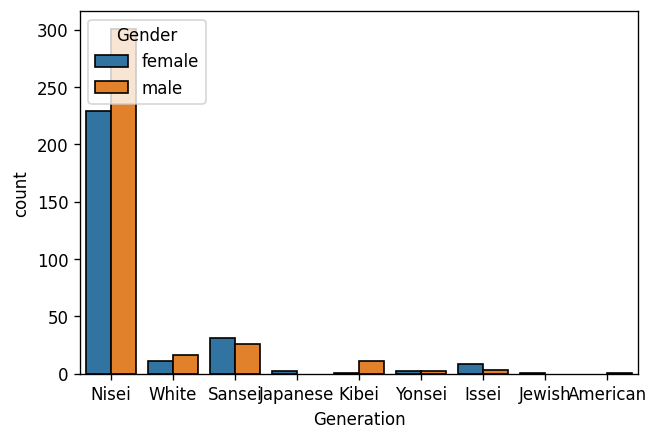

In [154]:
plt.figure(dpi = 120)
sns.countplot(x = 'Generation',hue='Gender', data = df1);

<span style='background:yellow'>**Question 7.**</span> **Monkeys Typing Shakespeare** A monkey is banging repeatedly on the keys of a typewriter. Each time, the monkey is equally likely to hit any of the 26 lowercase letters of the English alphabet, 26 uppercase letters of the English alphabet, and any number between 0-9 (inclusive), regardless of what it has hit before. There are no other keys on the keyboard.  

This question is inspired by a mathematical theorem called the Infinite monkey theorem (<https://en.wikipedia.org/wiki/Infinite_monkey_theorem>), which postulates that if you put a monkey in the situation described above for an infinite time, they will eventually type out all of Shakespeare’s works.

<span style='background:yellow'>**Question 7-1 (10 pt).**</span> Suppose the monkey hits the keyboard 5 times.  Compute the chance that the monkey types the sequence `Data8`.  (Call this `data_chance`.) Use algebra and type in an arithmetic equation that Python can evalute.

In [124]:
#### You code here
import math

data_chance=pow((1/62),5)
data_chance

1.0915447684774164e-09

<span style='background:yellow'>**Question 7-2 (10 pt).**</span> Write a function called `simulate_key_strike`.  It should take **no arguments**, and it should return a random one-character string that is equally likely to be any of the 26 lower-case English letters, 26 upper-case English letters, or any number between 0-9 (inclusive). 

In [123]:
#### You code here
import string
from numpy import random as rand

all_set =  list(string.ascii_lowercase + string.ascii_uppercase + string.digits)

def simulate_key_strike():
   # Selecting a random character from 'letters' and returning it.
   char = rand.choice(all_set)
   return char

# Printing output of function
print("Returned character:", simulate_key_strike())

Returned character: C


<span style='background:yellow'>**Question 7-3 (10 pt).**</span> Write a function called `simulate_several_key_strikes`.  It should take one argument: an integer specifying the number of key strikes to simulate. It should return a string containing that many characters, each one obtained from simulating a key strike by the monkey.

*Hint:* If you make a list or array of the simulated key strikes called `key_strikes_array`, you can convert that to a string by calling `"".join(key_strikes_array)`

In [120]:
#### You code here

import random
import string

def simulate_several_key_strikes(l):
   all_set =  list(string.ascii_lowercase + string.ascii_uppercase + string.digits)
   return ''.join(random.choice(all_set) for i in range(l))
print (simulate_several_key_strikes(10))

zmOHTOEru0
